<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<h1 align="center">Organization Info</h1> 

* Дедлайн **20 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task6.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

# Home work 1: Basic Artificial Neural Networks

Credit https://github.com/yandexdataschool/YSDA_deeplearning17, https://github.com/DmitryUlyanov


Зачем это всё нужно?! Зачем понимать как работают нейросети внутри когда уже есть куча библиотек?
- Время от времени Ваши сети не учатся, веса становятся nan-ами, все расходится и разваливается -- это можно починить если понимать бекпроп
- Если Вы не понимаете как работают оптимизаторы, то не сможете правильно выставить гиперпарааметры :) и тоже ничего выучить не выйдет
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design of was heavily inspired by [Torch](http://torch.ch) which is the most convenient neural network environment when the work involves defining new layers. 

This homework requires sending **"multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- hw6_Modules.ipynb

If you want to read more about backprop this links can be helpfull:
- http://udacity.com/course/deep-learning--ud730 
- http://cs231n.stanford.edu/2016/syllabus.html 
- http://www.deeplearningbook.org 

<h1 align="center">Check Questions</h1> 

**Вопрос 1**: Чем нейросети отличаются от линейных моделей, а чем похожи? 

Линейная модель это то же самое что один нейрон с функцией активации id. Нейросеть отличается от линейных моделей во-первых наличием нелинейных функций активации, а во-вторых наличием нескольких слоев, то есть мы делаем целый набор преобразований( то есть более формально в линейной модели есть только одна матрицу весов, а нейросеть содержит несколько слоев со своими матрицами весов)<br>

**Вопрос 2**: В чем недостатки полносвзяных нейронных сетей, какая мотивация к использованию свёрточных?

К недостаткам полносвязных сетей относиться то, что мы получаем очень много ребер. Кроме того полносвязные сети могут воспринимать объект как что-то цельное, то есть, например, для картинок полносвязная сеть рассмаривает картинку в целом, не выделяя в ней какие-либо подкартинки. Это может привести к переобучению. А свертка как раз позволяет разбить картинку на части. <br>

**Вопрос 3**: Какие слои используются в современных нейронных сетях? Опишите как работает каждый слой и свою интуицию зачем он нужен.

    - DenceLayer -- линейное преобразование Wx + b, можно интерпретировать как ..., очень похож на линейную алгебру и по этому работает так смена базиса
    - ConvolutionalLayer - вычисляем некое скалярное произведение с частью входа(для картинок это некие прямоугольники-подкартинки) и делаем так для каждой части. Получаем новую матрицу признаков. Нужна, чтобы искать некоторые паттерны не просто в кокретном месте, а в любом месте (например, паттерны в изображениях или в текстах)
    - Pooling - уменьшаем размерность информации при помощи объединения по какой-либо функции, например max. Нужна для уменьшения размерности. 
    - Dropout - вставляется между DenceLayer и убирает случайным образом ребра между нейронами двух соседних слоев. Можно нтерпретировать как регуляризацию.
    - Activation - нужнен, чтобы модель оказалась нелинейной. Если бы нелинейных слоев не было, то многократные перемножения матриц были бы эквивалентны умножению на одну какую-то матрицу, то есть тогда сеть ничем бы не отличалась от линейной модели. 
    
    
**Вопрос 4**: Может ли нейросеть решать задачу регрессии, какой компонент для этого нужно заменить в нейросети из лекции 1?

Да может, для этого нужно заменить последний слой, то есть в задаче регрессии последний слой должен вычислять линейную функцию вектора, который получил на вход.(в лекции мы применяем преобразование, которое выдает ответы 0/1)


**Вопрос 5**: Почему обычные методы оптимизации плохо работают с нейросетями? А какие работают хорошо? Почему они работают хорошо?

В нейросеть входят нелинейные функции и итоговая функция получается очень сложной, а с такими функциями плохо работают стандартные методы, кроме того, например, градиентный спуск может спускаться в локальные минимумы. Однако, модификации градиентного спуска работают хорошо. Например, можно уменьшать шаг градиентного спуска с инерцией(Momentum) или запоминать предыдущие движения и адаптироваться к тренду (AdaGrad) или использовать их модификации.

**Вопрос 6**: Для чего нужен backprop, чем это лучше/хуже чем считать градиенты без него? Почему backprop эффективно считается на GPU?

Если у нас большая нейросеть, то вычислить градиент функции потерь по весам может быть очень сложно, так как функция потерь в таких случаях получается очень сложной и зависит от многих параметров. Для решения этой проблемы есть Backprob. Мы сначала считаем градиент по сумматорным функциям выходного слоя. После, от этих градиентов переходим к градиентам по сумматорным функциям предыдущих слоев просто умножая предыдущий градиент на матрицу весов между этими слоями и на производную активации предпоследнего слоя. И так далее находим градиенты по сумматорным функциям любого нейрона любого слоя. Отсюда легко получить искомые градиенты по различным весам.

backprop эффективно считается на GPU так как при подсчете градиента нужно перемножать большое кол-во матриц(эта операция хорошо параллелиться), а GPU как раз очень эффективно выполняют векторные инструкции(в том числе матричное перемножение)


**Вопрос 7**: Почему для нейросетей не используют кросс валидацию, что вместо неё? Можно ли ее использовать?

Кросс валидация для нейросетей работает очень долго, так как нейросети очень долго обучаются. Вместо этого можно поделить выборку на train и test или на train validation test (validation используется для подбора гиперпараметров).

**Вопрос 8**: Небольшой quiz который поможет разобраться со свертками https://www.youtube.com/watch?v=DDRa5ASNdq4 



Ответ:

Same, stride 1: 28, 28, 8

Valid, stride 1: 26, 26, 8

Valid, stride 2: 13, 13, 8


-------------

Политика списывания. Вы можете обсудить решение с одногрупниками, так интереснее и веселее :) 
Не шарьте друг-другу код, в этом случаи вы ничему не научитесь -- "мыши плакали кололись но продолжали жрать кактус".

Теперь формально. Разница между списыванием и помощью товарища иногда едва различима. Мы искренне надеемся, что при любых сложностях вы можете обратиться к семинаристам и с их подсказками **самостоятельно** справиться с заданием. При зафиксированных случаях списывания (одинаковый код, одинаковые ошибки), баллы за задание будут обнулены всем участникам инцидента.

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import warnings
warnings.simplefilter("ignore")

# Важно 

    - Не забывайте делать GradCheck, чтобы проверить численно что производные правильные, обычно с первого раза не выходит никогда,   пример тут https://goo.gl/pzvzfe
    - Ваш код не должен содержать циклов, все вычисления должны бить векторные, внутри numpy 
    

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return AND store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

In [2]:
"""
    --------------------------------------
    -- Tech note
    --------------------------------------
    Inspired by torch I would use
    
    np.multiply, np.add, np.divide, np.subtract instead of *,+,/,-
    for better memory handling
        
    Suppose you allocated a variable    
        
        a = np.zeros(...)
    
    So, instead of
    
        a = b + c  # will be reallocated, GC needed to free
    
    I would go for: 
    
        np.add(b,c,out = a) # puts result in `a`
    
    But it is completely up to you.
"""
%run hw6_Modules.ipynb

Optimizer is implemented for you. 

In [3]:
def sgd_momentum(x, dx, config, state):
    """
        This is a very ugly implementation of sgd with momentum 
        just to show an example how to store old grad in state.
        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    # x and dx have complex structure, old dx will be stored in a simpler one
    state.setdefault('old_grad', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            
            cur_x -= cur_old_grad
            i += 1     

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

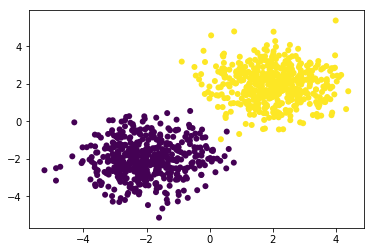

In [12]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

**Посмотрим на первую модель**

In [7]:
net = Sequential()
net.add(Linear(2, 2))
net.add(SoftMax())

criterion = ClassNLLCriterion()

print(net)


Linear 2 -> 2
SoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [9]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [4]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

In [5]:
def train_history():
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in get_batches((X, Y), batch_size):

            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)

            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            # Update weights
            sgd_momentum(net.getParameters(), 
                         net.getGradParameters(), 
                         optimizer_config,
                         optimizer_state)      

            loss_history.append(loss)

        # Visualize
        display.clear_output(wait=True)
        plt.figure(figsize=(8, 6))

        plt.title("Training loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(loss_history, 'b')
        plt.show()

        print('Current loss: %f' % loss)  

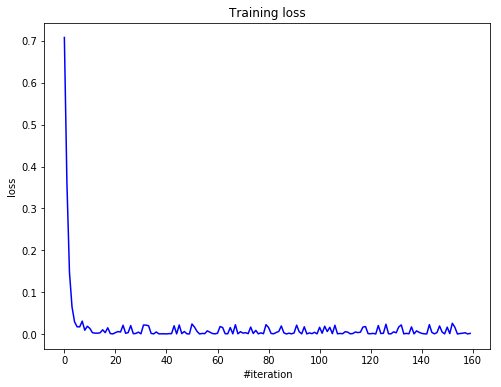

Current loss: 0.001405


In [214]:
train_history()

**Посмотрим на вторую модель**

In [216]:
# Test something like that then 
net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(SoftMax())
print(net)

# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

Linear 2 -> 4
ReLU
Linear 4 -> 2
SoftMax



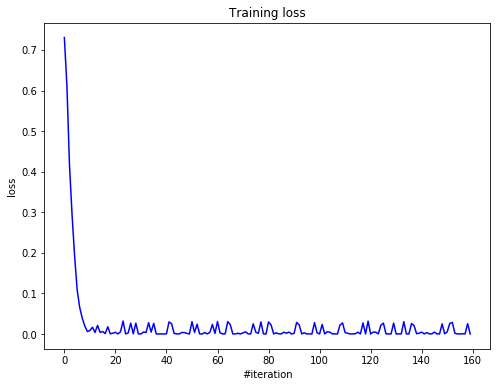

Current loss: 0.000065


In [217]:
train_history()  

# Digit classification 

We are using [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. Lets start with [cool visualization](http://scs.ryerson.ca/~aharley/vis/). The most beautiful demo is the second one, if you are not familiar with convolutions you can return to it in several lectures. 

In [6]:
import os
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        y = data['y']
else:
    mnist = fetch_mldata("mnist-original")
    X, y = mnist.data / 255.0, mnist.target
    np.savez('mnist.npz', X=X, y=y)

One-hot encode the labels first.

In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
frame = pd.DataFrame(y)
enc = OneHotEncoder()
Y = enc.fit_transform(frame).toarray()

- **Compare** `ReLU`, `ELU` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.

**Будем сравнивать 3 функции активации ReLU, LeakyReLU и ELU. В hw6_Modules также допольнительно реализована ELU**

**ReLU**

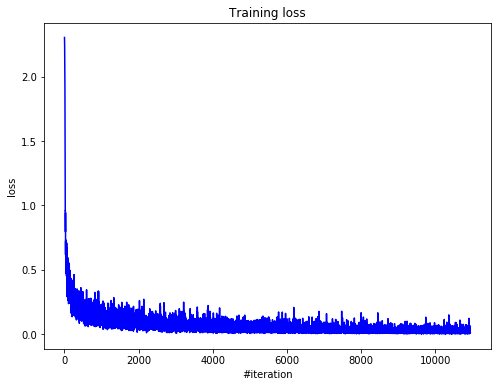

Current loss: 0.010218


In [15]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

net = Sequential()
net.add(Linear(X.shape[1], X.shape[1]))
net.add(Dropout())
net.add(ReLU())
net.add(Linear(X.shape[1], Y.shape[1]))
net.add(SoftMax())
print(net)

train_history()

**LeakyReLU**

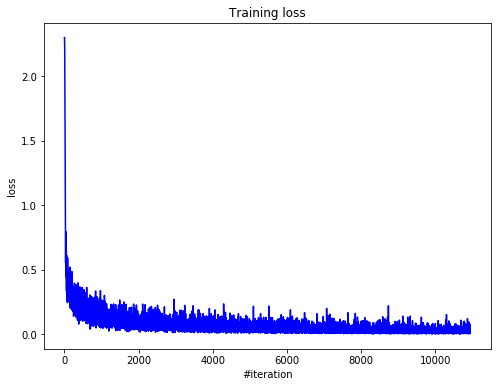

Current loss: 0.010140


In [16]:
net = Sequential()
net.add(Linear(X.shape[1], X.shape[1]))
net.add(Dropout())
net.add(LeakyReLU())
net.add(Linear(X.shape[1], Y.shape[1]))
net.add(SoftMax())
print(net)

train_history()

**ELU**

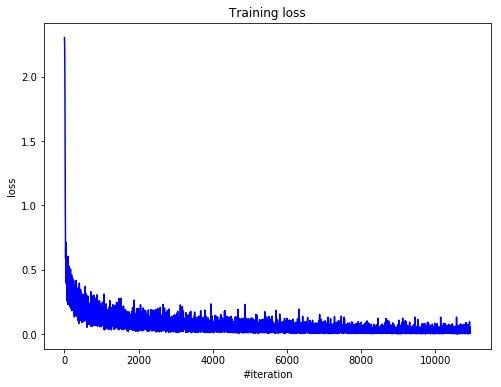

Current loss: 0.016343


In [17]:
net = Sequential()
net.add(Linear(X.shape[1], X.shape[1]))
net.add(Dropout())
net.add(ELU())
net.add(Linear(X.shape[1], Y.shape[1]))
net.add(SoftMax())
print(net)

train_history()

Видим, что на данном примере самый маленький лосс получился при использовании LeakyReLU. Хотя он незначительно отличается от ReLU

**Finally**, use all your knowledge to build a super cool model on this dataset, do not forget to split dataset into train and validation. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. 

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=0)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


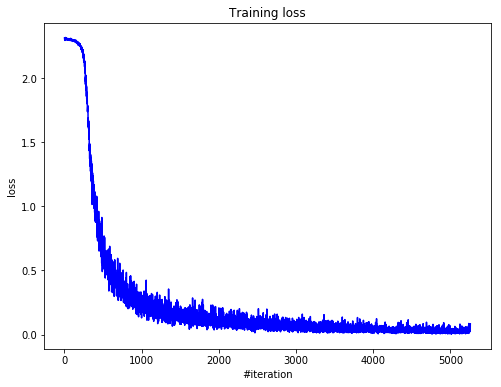

Current loss: 0.084404


In [263]:
# Your code goes here.
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 200

net = Sequential()
net.add(Linear(X.shape[1], 500))
net.add(Dropout(p=0.85))
net.add(LeakyReLU())
net.add(Linear(500, 300))
net.add(Dropout(p=0.90))
net.add(LeakyReLU())
net.add(Linear(300, 100))
net.add(Dropout(p=0.95))
net.add(LeakyReLU())
net.add(Linear(100, 30))
net.add(LeakyReLU())
net.add(Linear(30, Y.shape[1]))
net.add(SoftMax())

criterion = ClassNLLCriterion()



loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):

        net.zeroGradParameters()

        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)

        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)

        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      

        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))

    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()

    print('Current loss: %f' % loss)  

Print here your accuracy. It should be around 90%.

Посмотрим на предсказания для обучающей выборки

In [264]:
# Your answer goes here.
from sklearn.metrics import accuracy_score
predictions = net.forward(X_train)
accuracy_score(np.argmax(y_train, axis=1), np.argmax(predictions, axis=1))

0.9919809523809524

Получилась очень большая точность. Возможно мы переобучились. Посмотрим на результат на валидационной выборке.

In [265]:
predictions = net.forward(X_val)
accuracy_score(np.argmax(y_val, axis=1), np.argmax(predictions, axis=1))

0.9722285714285714

Нет, все хорошо, не переобучились

# Bonus Part: Autoencoder 

This part is **OPTIONAL**, you may not do it. It will not be scored, but it is easy and interesting.

Now we are going to build a cool model, named autoencoder. The aim is simple: **encode** the data to a lower dimentional representation. Why? Well, if we can **decode** this representation back to original data with "small" reconstuction loss then we can store only compressed representation saving memory. But the most important thing is -- we can reuse trained autoencoder for classification. 
<img src="img/autoencoder.png">

Picture from this [site](http://multithreaded.stitchfix.com/blog/2015/09/17/deep-style/).

Now implement an autoencoder:

Build it such that dimetionality inside autoencoder changes like that: 

$$784 \text{ (data)} -> 512 -> 256 -> 128 -> 30 -> 128 -> 256 -> 512 -> 784$$

Use **MSECriterion** to score the reconstruction.

You may train it for 9 epochs with batch size = 256, initial lr = 0.1 droping by a factor of 2 every 3 epochs. The reconstruction loss should be about 6.0 and visual quality decent already.
Do not spend time on changing architecture, they are more or less the same. 

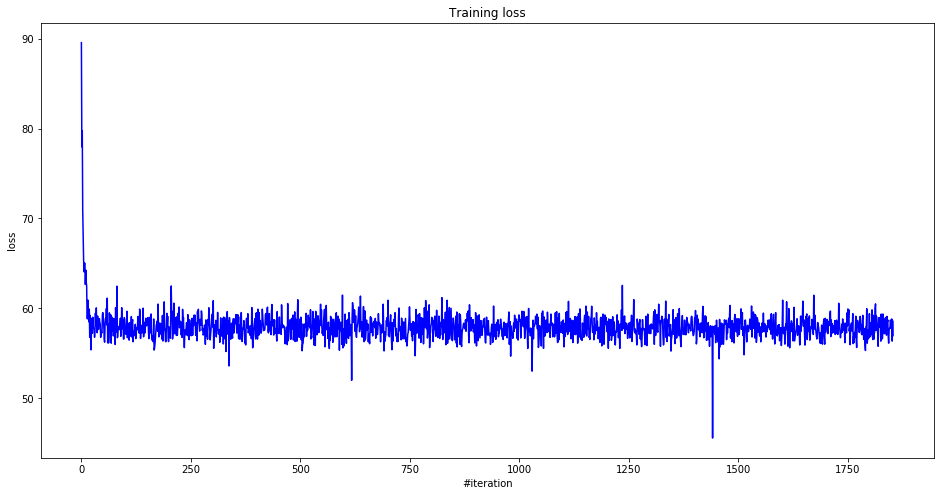

Current loss: 56.964413


In [22]:
# Iptimizer params
optimizer_state = {}

# Looping params
n_epoch = 9
batch_size = 256

net = Sequential()
net.add(Linear(784, 512))
net.add(ReLU())
net.add(Linear(512, 256))
net.add(ReLU())
net.add(Linear(256, 128))
net.add(ReLU())
net.add(Linear(128, 30))
net.add(ReLU())
net.add(Linear(30, 128))
net.add(ReLU())
net.add(Linear(128, 256))
net.add(ReLU())
net.add(Linear(256, 512))
net.add(ReLU())
net.add(Linear(512, 784))
net.add(ReLU())

criterion = MSECriterion()

loss_history = []

lr = 0.2 

# немного изменим код функции train_history для уменьшения lr
for i in range(n_epoch):
    if i % 3 == 0:
        lr *= 0.5
    optimizer_config = {'learning_rate' : lr, 'momentum': 0.9}
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)

        loss = criterion.forward(predictions, x_batch)
    
        # Backward
        dp = criterion.backward(predictions, x_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)     
        
        loss_history.append(loss)
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(16, 8))
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)   

что-то плохой лосс, но вроде все верно(

Some time ago NNs were a lot poorer and people were struggling to learn deep models. To train a classification net people were training autoencoder first (to train autoencoder people were pretraining single layers with [RBM](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine)), then substituting the decoder part with classification layer (yeah, they were struggling with training autoencoders a lot, and complex techniques were used at that dark times). We are going to this now, fast and easy.  

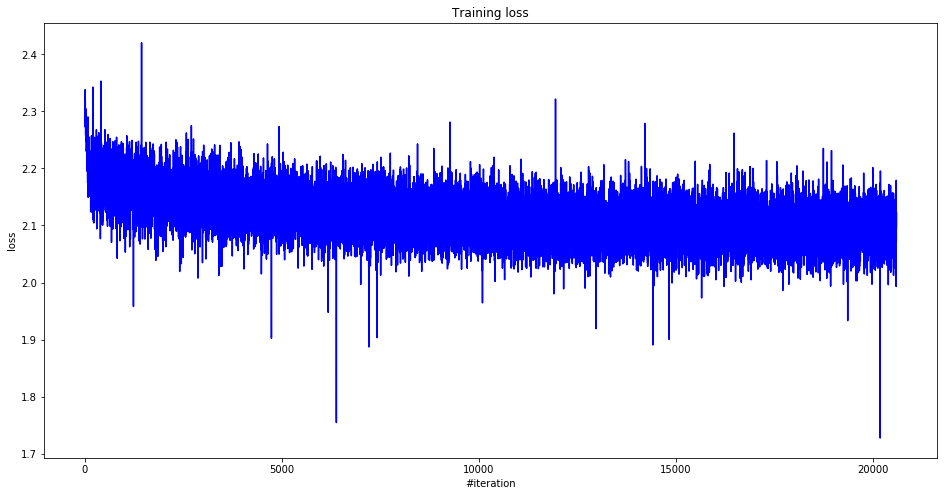

Current loss: 2.097861


In [25]:
# Extract inner representation for train and validation, 
# you should get (n_samples, 30) matrices
train_res = net.forward(X_train)
X_train_feat = net.modules[7].output
test_res = net.forward(X_val)
X_val_feat = net.modules[7].output

# Now build a logistic regression or small classification net
cnet = Sequential()
cnet.add(Linear(30, 10))
cnet.add(SoftMax())

# Learn the weights
criterion = ClassNLLCriterion()

optimizer_state = {}
lr = 0.9
n_epoch = 100
batch_size = 256

loss_history = []
for i in range(n_epoch):
    if i % 2 == 0:
        lr *= 0.95
    optimizer_config = {'learning_rate' : lr, 'momentum': 0.9}
    for x_batch, y_batch in get_batches((X_train_feat, y_train), batch_size):
        
        cnet.zeroGradParameters()
        
        # Forward
        predictions = cnet.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        cnet.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(cnet.getParameters(), 
                     cnet.getGradParameters(),
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)
    
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(16, 8))
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    print('Current loss: %f' % loss)    

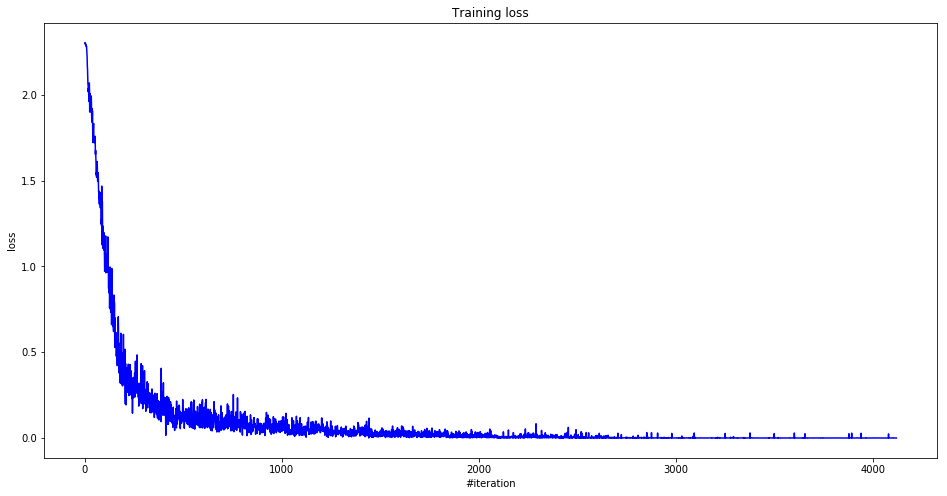

Current loss: 0.000131


In [19]:
# Now chop off decoder part
# (you may need to implement `remove` method for Sequential container) 
autoenc = net
autoenc.modules = autoenc.modules[:8]

# And add learned layers ontop.
autoenc.add(cnet[0])
autoenc.add(cnet[1])

# Now optimize whole model

criterion = ClassNLLCriterion()

# Iptimizer params
optimizer_state = {}
lr = 0.1

# Looping params
n_epoch = 20
batch_size = 256

loss_history = []

for i in range(n_epoch):
    if i % 2 == 0:
        lr *= 0.9
    optimizer_config = {'learning_rate' : lr, 'momentum': 0.9}
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        autoenc.zeroGradParameters()
        
        # Forward
        predictions = autoenc.forward(x_batch)

        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        autoenc.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(autoenc.getParameters(), 
                     autoenc.getGradParameters(),
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(16, 8))
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)   

Посмотрим на accuracy

In [20]:
predictions = autoenc.forward(X_val)
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions.argmax(axis=1), y_val.argmax(axis=1)))

0.9797714285714286


Получили хороший accuracy

* What do you think, does it make sense to build real-world classifiers this way ? Did it work better for you than a straightforward one? Looks like it was not the same ~8 years ago, what has changed beside computational power? 

Run PCA with 30 components on the *train set*, plot original image, autoencoder and PCA reconstructions side by side for 10 samples from *validation set*.
Probably you need to use the following snippet to make aoutpencoder examples look comparible.

In [ ]:
# np.clip(prediction,0,1)
#
# Your code goes here. ################################################